<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

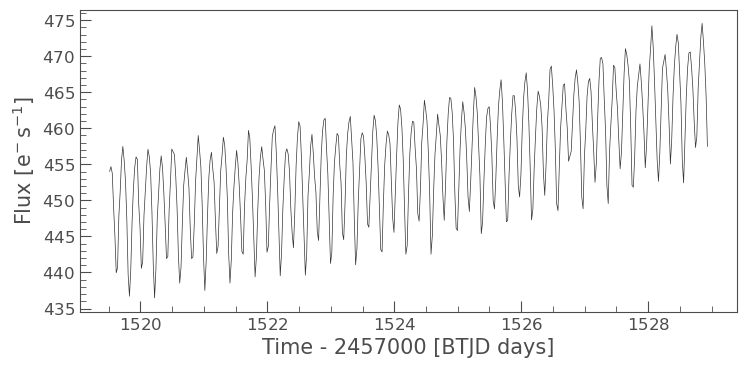

In [1]:
import numpy as np
import lightkurve as lk
%matplotlib inline

result = lk.search_tesscut('156.736+2.533')
cut = result[0].download()
lc = cut[100:550].to_lightcurve()
lc.plot()

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

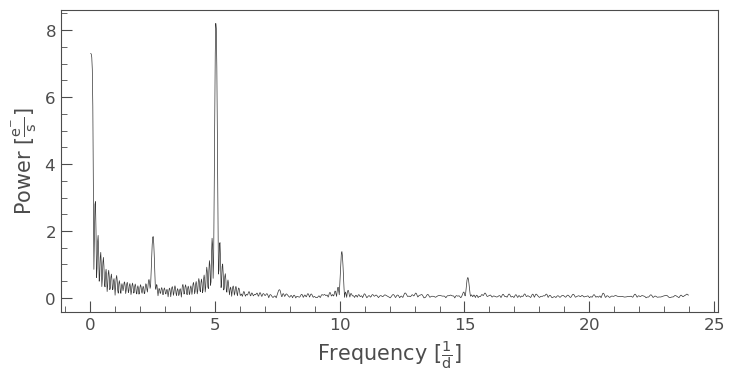

In [3]:
pg = lc.to_periodogram()
pg.plot()

In [ ]:
pg.show_properties()

In [4]:
def lorentzian(x, a, b):
    return (1/np.pi)*(b/(((x-a)**2)+b**2))

In [6]:
x_stuff = pg.frequency.value
y_stuff = pg.power.value

In [7]:
x_data = x_stuff[(x_stuff>4.92) & (x_stuff<5.15)]
y_data = y_stuff[(x_stuff>4.92) & (x_stuff<5.15)]

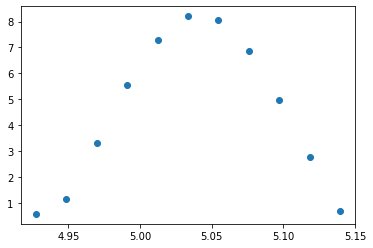

In [8]:
plt.scatter(x_data, y_data)

In [10]:
popt, pcov = curve_fit(lorentzian, x_data, y_data, p0=[5, 0.05])
popt

array([5.041362  , 0.03741942])

In [11]:
a, b = popt

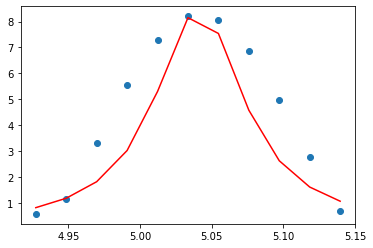

In [12]:
x_model = np.linspace(min(x_data), max(x_data), 11)
y_model = lorentzian(x_data, a, b)

plt.scatter(x_data, y_data)

plt.plot(x_model, y_model, color='r')

In [13]:
pcov

array([[ 3.88676270e-05, -3.26502455e-07],
       [-3.26502455e-07,  4.02133572e-05]])

In [ ]:
np.diag(pcov)

In [14]:
yerror = np.sqrt(y_data)

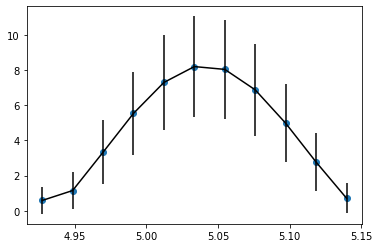

In [18]:
plt.errorbar(x_data, y_data, yerror, color='k')
plt.scatter(x_data, y_data)
plt.show()

In [16]:
popt_err, pcov_err = curve_fit(lorentzian, x_data, y_data, sigma= yerror, p0=[5, 0.05])
popt_errha

array([5.04119009, 0.03770535])

ValueError: x and y must have same first dimension, but have shapes (20,) and (11,)

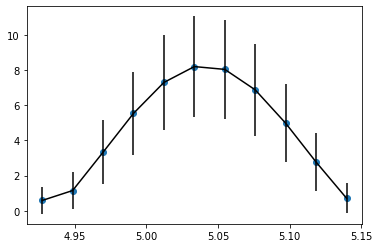

In [22]:
a1, b1 = popt_err

x_model = np.linspace(min(x_data), max(x_data), 20)
y_model1 = lorentzian(x_data, a1, b1)
plt.scatter(x_data, y_data)
plt.errorbar(x_data, y_data, yerror, color='k')
plt.plot(x_model, y_model1, color='r')